# Projet : Anticiper les besoins en consommation de bâtiments : Notebook3 prédiction de l'émission CO2

In [1]:
## Importation des librairies nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Chargement des données
GHGEmissions = pd.read_csv("GHGEmissions.csv",sep=",")

In [3]:
#Utilisation du code d'identification des bâtiments comme index

GHGEmissions.set_index("OSEBuildingID", inplace=True)

In [4]:
GHGEmissions.head(3)

Latitude  Longitude  NumberofBuildings  NumberofFloors  \
OSEBuildingID                                                           
1              47.61220 -122.33799                1.0              12   
2              47.61317 -122.33393                1.0              11   
5              47.61412 -122.33664                1.0              10   

               PropertyGFAParking  PropertyGFABuilding(s)  \
OSEBuildingID                                               
1                               0                   88434   
2                           15064                   88502   
5                               0                   61320   

               SecondLargestPropertyUseTypeGFA  \
OSEBuildingID                                    
1                                          0.0   
2                                      15064.0   
5                                          0.0   

               ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  \
OSEBuildingID                                                    
1                                         0.0             60.0   
2                                      4622.0             61.0   
5                                         0.0             56.0   

               TotalGHGEmissions  ...  LargestPropertyUseType_Housing  \
OSEBuildingID                     ...                                   
1                         249.98  ...                             0.0   
2                         295.86  ...                             0.0   
5                         286.43  ...                             0.0   

               LargestPropertyUseType_Office  LargestPropertyUseType_Other  \
OSEBuildingID                                                                
1                                        0.0                           0.0   
2                                        0.0                           0.0   
5                                        0.0                           0.0   

               LargestPropertyUseType_Parking  LargestPropertyUseType_Stores  \
OSEBuildingID                                                                  
1                                         0.0                            0.0   
2                                         0.0                            0.0   
5                                         0.0                            0.0   

               LargestPropertyUseType_Warehouse  \
OSEBuildingID                                     
1                                           0.0   
2                                           0.0   
5                                           0.0   

               LargestPropertyUseType_Well-being  \
OSEBuildingID                                      
1                                            0.0   
2                                            0.0   
5                                            0.0   

               LargestPropertyUseType_Worship Facility  \
OSEBuildingID                                            
1                                                  0.0   
2                                                  0.0   
5                                                  0.0   

               BuildingType_Nonresidential COS  BuildingType_SPS-District K-12  
OSEBuildingID                                                                   
1                                          0.0                             0.0  
2                                          0.0                             0.0  
5                                          0.0                             0.0  

[3 rows x 30 columns]

In [5]:
# Création d'une classification sur la varaible cible 'TotalGHGEmissions'

'''Nous avons observé que les valeurs de la variable cible varient entre 0 et 1266.06 pour les 1571 bâtiments. Afin de mettre en place une stratification, nous créons 5 classes pour les 1599 observations.
Nous stockons ces classes dans la variables 'GHGE_class'. '''

GHGEmissions['GHGE_class'] = 0

GHGEmissions.loc[((GHGEmissions['TotalGHGEmissions'] > 14.37) & (GHGEmissions['TotalGHGEmissions'] <= 35.48)), 'GHGE_class'] = 1
GHGEmissions.loc[((GHGEmissions['TotalGHGEmissions'] > 35.48) & (GHGEmissions['TotalGHGEmissions'] <= 67.51)), 'GHGE_class'] = 2
GHGEmissions.loc[((GHGEmissions['TotalGHGEmissions'] > 67.51) & (GHGEmissions['TotalGHGEmissions'] <= 172.58)), 'GHGE_class'] = 3
GHGEmissions.loc[GHGEmissions['TotalGHGEmissions'] > 172.58, 'GHGE_class'] = 4

In [6]:
GHGEmissions['GHGE_class'].value_counts()

GHGE_class
2    322
3    322
1    321
0    313
4    293
Name: count, dtype: int64

In [7]:
GHGEmissions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1571 entries, 1 to 50226
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Latitude                                 1571 non-null   float64
 1   Longitude                                1571 non-null   float64
 2   NumberofBuildings                        1571 non-null   float64
 3   NumberofFloors                           1571 non-null   int64  
 4   PropertyGFAParking                       1571 non-null   int64  
 5   PropertyGFABuilding(s)                   1571 non-null   int64  
 6   SecondLargestPropertyUseTypeGFA          1571 non-null   float64
 7   ThirdLargestPropertyUseTypeGFA           1571 non-null   float64
 8   ENERGYSTARScore                          1571 non-null   float64
 9   TotalGHGEmissions                        1571 non-null   float64
 10  BuildingAge                              1571 non-nu

In [8]:
# Diviion des données 70% train, 30% test

from sklearn.model_selection import train_test_split

seed = 190
test_size = 0.3

X = GHGEmissions.drop(columns=['TotalGHGEmissions','GHGE_class'], axis=1)
y = GHGEmissions['TotalGHGEmissions']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, stratify=GHGEmissions['GHGE_class'], random_state = seed)

In [9]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1099, 29) (1099,) (472, 29) (472,)


In [10]:
# Standardisation des données 

'''Comme nous avons vu dans le notebook exploratoire que les boxplots des différentes variables présentaient des valeurs extrêmes, nous choisissons de standardiser les données via RobustScaler'''

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_trf = pd.DataFrame(data=scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_trf = pd.DataFrame(data=scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

# Modélisation des premiers modèles incluant la variable 'ENERGYSTARScore' comme variable explicative

In [11]:
# Importation des modèles

from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.ensemble import AdaBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score, explained_variance_score
from sklearn.model_selection import GridSearchCV
import time

In [12]:
# Nous choisissons de construire plusieurs modèles avec les hyperparamètres par défaut, ensuite nous optimiserons les hyperparamètres du modèle de base le plus performant.

reg_models = {
    "Lin_reg":{'model': LinearRegression()},
    "dum_reg":{'model': DummyRegressor()},
    "knn_reg":{'model': KNeighborsRegressor()},
    "rf_reg":{'model': RandomForestRegressor(random_state=seed)},
    "ela_reg":{'model': ElasticNet(random_state=seed)},
    "lgbm_reg":{'model': LGBMRegressor(random_state=seed)},
    "xgb_reg": {'model': XGBRegressor(random_state=seed)},
    "ada_reg": {'model': AdaBoostRegressor(random_state=seed)},
}
                    
reg_models

{'Lin_reg': {'model': LinearRegression()},
 'dum_reg': {'model': DummyRegressor()},
 'knn_reg': {'model': KNeighborsRegressor()},
 'rf_reg': {'model': RandomForestRegressor(random_state=190)},
 'ela_reg': {'model': ElasticNet(random_state=190)},
 'lgbm_reg': {'model': LGBMRegressor(random_state=190)},
 'xgb_reg': {'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_e

In [13]:
# Entraînement des modèles 

for model_name in reg_models.keys():
    fitted_model = reg_models[model_name]['model'].fit(X_train_trf, y_train)
    
    y_train_pred = fitted_model.predict(X_train_trf)
    y_test_pred = fitted_model.predict(X_test_trf)
       
    reg_models[model_name]['R2_train'] = r2_score(y_train, y_train_pred)
    reg_models[model_name]['R2_test'] = r2_score(y_test, y_test_pred)
    reg_models[model_name]['RMSE_train'] = mean_squared_error(y_train, y_train_pred,squared=False)
    reg_models[model_name]['RMSE_test'] = mean_squared_error(y_test, y_test_pred,squared=False)
    reg_models[model_name]['MAE_train'] = mean_absolute_error(y_train, y_train_pred)
    reg_models[model_name]['MAE_test'] = mean_absolute_error(y_test, y_test_pred)
    reg_models[model_name]['MEDAE_train'] = median_absolute_error(y_train, y_train_pred)
    reg_models[model_name]['MEDAE_test'] = median_absolute_error(y_test, y_test_pred)
    reg_models[model_name]['EVS_train'] = explained_variance_score(y_train, y_train_pred)
    reg_models[model_name]['EVS_test'] = explained_variance_score(y_test, y_test_pred)
    
print(reg_models)

C:\Users\tykap\anaconda3\envs\myenv\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\tykap\anaconda3\envs\myenv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1602
[LightGBM] [Info] Number of data points in the train set: 1099, number of used features: 23
[LightGBM] [Info] Start training from score 105.716069
{'Lin_reg': {'model': LinearRegression(), 'R2_train': 0.531512267016321, 'R2_test': 0.49946252109039224, 'RMSE_train': 106.07243308899763, 'RMSE_test': 111.30509855033323, 'MAE_train': 64.54912785991968, 'MAE_test': 64.67160612159951, 'MEDAE_train': 40.071030411401594, 'MEDAE_test': 41.103333479064794, 'EVS_train': 0.531512267016321, 'EVS_test': 0.49986518773100663}, 'dum_reg': {'model': DummyRegressor(), 'R2_train': 0.0, 'R2_test': -9.191348078529948e-05, 'RMSE_train': 154.97206461702706, 'RMSE_test': 157.33187392680097, 'MAE_train': 100.48832181791536, 'MAE_test': 100.

In [14]:
# Présetation des metrics sous forme de dataframe

reg_metrics = pd.DataFrame.from_dict(reg_models, 'index')[["R2_train","R2_test","RMSE_train","RMSE_test","MAE_train","MAE_test","MEDAE_train","MEDAE_test","EVS_train","EVS_test"]]
reg_metrics

reg_metrics.sort_values(by = "R2_test",ascending=False)


R2_train   R2_test  RMSE_train   RMSE_test   MAE_train    MAE_test  \
lgbm_reg  0.947368  0.658550   35.553218   91.930636   19.144300   46.573438   
rf_reg    0.954741  0.652359   32.969053   92.760263   17.286737   45.871453   
xgb_reg   0.999277  0.640517    4.168294   94.326984    2.863969   46.986600   
Lin_reg   0.531512  0.499463  106.072433  111.305099   64.549128   64.671606   
ela_reg   0.362043  0.320548  123.779632  129.680935   73.283783   72.591739   
knn_reg   0.438095  0.143793  116.167566  145.574775   64.109383   81.040123   
ada_reg   0.205707  0.054232  138.115942  152.999134  129.139236  135.992646   
dum_reg   0.000000 -0.000092  154.972065  157.331874  100.488322  100.471588   

          MEDAE_train  MEDAE_test  EVS_train      EVS_test  
lgbm_reg    10.491676   19.389295   0.947368  6.585505e-01  
rf_reg       7.007300   16.975650   0.954742  6.526263e-01  
xgb_reg      1.915154   20.340714   0.999277  6.405196e-01  
Lin_reg     40.071030   41.103333   0.531512  4.998652e-01  
ela_reg     46.969106   44.351584   0.362043  3.207824e-01  
knn_reg     27.176000   32.661000   0.439459  1.470630e-01  
ada_reg    134.151405  136.259486   0.682073  5.094452e-01  
dum_reg     78.656069   77.451069   0.000000  1.110223e-16

In [15]:
# Optimisation du modèle LGBMRegressor

# Création d'une instance LGBMRegressor

lgbm = LGBMRegressor(random_state=seed)

# Paramètres à optimiser
parameters = {
    'max_depth':[5, 10, 20],
    'n_estimators':[100, 200, 300],
    'learning_rate':[0.01, 0.1, 1],
}

In [16]:
# Création du GridSearchCV

from sklearn.model_selection import GridSearchCV
import time

grid_lgbm = GridSearchCV(lgbm, parameters, cv=5, n_jobs=-1, verbose=1)

# Enregistrement du temps actuel
start_time = time.time()

# Entrainement du modèle
grid_lgbm.fit(X_train_trf, y_train)

#Affichage des meilleurs paramètres
print("Best parameters set : ")
print(grid_lgbm.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000264 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1602
[LightGBM] [Info] Number of data points in the train set: 1099, number of used features: 23
[LightGBM] [Info] Start training from score 105.716069
Best parameters set : 
{'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 300}


In [17]:
# Utilisons les meilleurs hyperparamètres trouvés pour construire le modèle


lgbm_best = LGBMRegressor(max_depth=20, learning_rate=0.01, n_estimators=300, random_state=seed, n_jobs=-1)

# Entrainement du modèle
lgbm_best.fit(X_train_trf, y_train)

# Calcul du temps d'exécution
elapsed_time = time.time() - start_time
print(f"Temps d'exécution : {elapsed_time:.2f} secondes")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1602
[LightGBM] [Info] Number of data points in the train set: 1099, number of used features: 23
[LightGBM] [Info] Start training from score 105.716069
Temps d'exécution : 21.63 secondes


In [18]:
# Les prédictions

y_train_pred = lgbm_best.predict(X_train_trf)
y_test_pred = lgbm_best.predict(X_test_trf)
    

# Les metrics de performance

R2_train = r2_score(y_train, y_train_pred)
R2_test = r2_score(y_test, y_test_pred)
RMSE_train = mean_squared_error(y_train, y_train_pred,squared=False)
RMSE_test = mean_squared_error(y_test, y_test_pred,squared=False)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
MEDAE_train = median_absolute_error(y_train, y_train_pred)
MEDAE_test = median_absolute_error(y_test, y_test_pred)
EVS_train = explained_variance_score(y_train, y_train_pred)
EVS_test = explained_variance_score(y_test, y_test_pred)

# Affichage des résultats
performance_table = pd.DataFrame({
    'Métrics': ['R²', 'RMSE', 'MAE','MEDAE','EVS'],
    'Ensemble d\'entraînement': [R2_train, RMSE_train, MAE_train, MEDAE_train, EVS_train],
    'Ensemble de test': [R2_test, RMSE_test, MAE_test, MEDAE_test, EVS_test]
})
print(performance_table)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
  Métrics  Ensemble d'entraînement  Ensemble de test
0      R²                 0.824571          0.648351
1    RMSE                64.908921         93.293536
2     MAE                33.180618         46.555649
3   MEDAE                14.853684         18.979470
4     EVS                 0.824571          0.648355


In [19]:
#Essayons un modéle optimisé avec RandomForestRegressor

model_RF = RandomForestRegressor(random_state=seed)

# Paramètres à optimiser
parameters = {
    'n_estimators':[100, 200, 300],
    'max_depth': [3, 7, 11, 15],
    'criterion': ['squared_error', 'absolute_error'],
    'max_features': ['sqrt', None]
}

grid_rf = GridSearchCV(model_RF, parameters, cv=5, n_jobs=-1, verbose=1)

# Enregistrement du temps actuel
start_time = time.time()

# Entrainement du modèle
grid_rf.fit(X_train_trf, y_train)

#Affichage des meilleurs paramètres
print("Best parameters set : ")
print(grid_rf.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters set : 
{'criterion': 'absolute_error', 'max_depth': 15, 'max_features': None, 'n_estimators': 300}


In [20]:
model_RF_best = RandomForestRegressor(n_estimators=300, max_depth=15, max_features=None, criterion='absolute_error', random_state=seed)

# Entraîner le modèle sur l'ensemble d'entraînement
model_RF_best.fit(X_train_trf, y_train)

# Calcul du temps d'exécution
elapsed_time = time.time() - start_time
print(f"Temps d'exécution : {elapsed_time:.2f} secondes")

Temps d'exécution : 325.26 secondes


In [21]:
# Les prédictions

y_train_pred = model_RF_best.predict(X_train_trf)
y_test_pred = model_RF_best.predict(X_test_trf)


# Les metrics de performance

R2_train = r2_score(y_train, y_train_pred)
R2_test = r2_score(y_test, y_test_pred)
RMSE_train = mean_squared_error(y_train, y_train_pred,squared=False)
RMSE_test = mean_squared_error(y_test, y_test_pred,squared=False)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
MEDAE_train = median_absolute_error(y_train, y_train_pred)
MEDAE_test = median_absolute_error(y_test, y_test_pred)
EVS_train = explained_variance_score(y_train, y_train_pred)
EVS_test = explained_variance_score(y_test, y_test_pred)

# Affichage des résultats
performance_table = pd.DataFrame({
    'Métrics': ['R²', 'RMSE', 'MAE','MEDAE','EVS'],
    'Ensemble d\'entraînement': [R2_train, RMSE_train, MAE_train, MEDAE_train, EVS_train],
    'Ensemble de test': [R2_test, RMSE_test, MAE_test, MEDAE_test, EVS_test]
})
print(performance_table)

  Métrics  Ensemble d'entraînement  Ensemble de test
0      R²                 0.950637          0.627833
1    RMSE                34.431361         95.976646
2     MAE                18.331428         46.350432
3   MEDAE                 8.034700         16.432508
4     EVS                 0.950638          0.628156


In [22]:
# Création d'une instance XGBRegressor

xgbr = XGBRegressor(random_state=seed)

# Paramètres à optimiser
parameters = {
    'max_depth':[5, 10, 20, 25],
    'learning_rate':[0.001, 0.01, 0.1, 1],
    'subsample':[0.2, 0.3, 0.4, 0.5, 0.6],
    'n_estimators':[100, 200,300, 400],
}

grid_search = GridSearchCV(xgbr, parameters, cv=5, n_jobs=-1, verbose=1, error_score='raise')

# Enregistrement du temps actuel
start_time = time.time()

# Entrainement du modèle
grid_search.fit(X_train_trf, y_train)

#Affichage des meilleurs paramètres
print("Best parameters set : ")
print(grid_search.best_params_)


Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Best parameters set : 
{'learning_rate': 0.01, 'max_depth': 25, 'n_estimators': 400, 'subsample': 0.3}


In [23]:
# Créer un modèle xgboost avec les meilleurs hyperparamètres identifiés

xgbr_best = XGBRegressor(max_depth=25, learning_rate=0.01, n_estimators=400, subsample=0.3)

# Entraîner le modèle sur l'ensemble d'entraînement
xgbr_best.fit(X_train_trf, y_train)

# Calcul du temps d'exécution
elapsed_time = time.time() - start_time
print(f"Temps d'exécution : {elapsed_time:.2f} secondes")

Temps d'exécution : 443.81 secondes


In [24]:
# Les prédictions

y_train_pred = xgbr_best.predict(X_train_trf)
y_test_pred = xgbr_best.predict(X_test_trf)


# Les metrics de performance

R2_train = r2_score(y_train, y_train_pred)
R2_test = r2_score(y_test, y_test_pred)
RMSE_train = mean_squared_error(y_train, y_train_pred,squared=False)
RMSE_test = mean_squared_error(y_test, y_test_pred,squared=False)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
MEDAE_train = median_absolute_error(y_train, y_train_pred)
MEDAE_test = median_absolute_error(y_test, y_test_pred)
EVS_train = explained_variance_score(y_train, y_train_pred)
EVS_test = explained_variance_score(y_test, y_test_pred)

# Affichage des résultats
performance_table = pd.DataFrame({
    'Métrics': ['R²', 'RMSE', 'MAE','MEDAE','EVS'],
    'Ensemble d\'entraînement': [R2_train, RMSE_train, MAE_train, MEDAE_train, EVS_train],
    'Ensemble de test': [R2_test, RMSE_test, MAE_test, MEDAE_test, EVS_test]
})
print(performance_table)

  Métrics  Ensemble d'entraînement  Ensemble de test
0      R²                 0.919727          0.680299
1    RMSE                43.907375         88.954670
2     MAE                20.988071         43.899667
3   MEDAE                 9.021491         19.127404
4     EVS                 0.919860          0.680376


''' Au vue des différents modèles de regression testés, nous retenons celui via LGBMRegressor. En effet, il présente de bonnes performances sur les données d'entraînement avec un 
r2_score à 0.82 et un r2_score à 0.64 sur les données de test. Ce modèle même s'il n'a pas pas les meilleurs performances que les 2 autres (XGBRegressor et RandomForest,
il a l'avantage d'être beaucoup plus stable avec peu de surapprentissage par rapport aux 2 autres.'''
Nous analysons donc l'interprétabilité à par partir du modèle optimisé LGBMRegressor.

In [25]:
# Analysons l'interprétabilité locale et globale du modèle LGBMRegressor

## Shapley Values (évaluation de l'impact de chaque caractéristique sur une prédiction donnée)

import shap

#Initialisation du Javascript

shap.initjs()

#Création de l'explainer 
explainer = shap.TreeExplainer(lgbm_best)

# Calcul des valeurs SHAP  pour les instances de test
shap_values = explainer.shap_values(X_test_trf)

#Choisir un exemple spécifique à expliquer
i = 0
shap.force_plot(explainer.expected_value, shap_values[i,:], X_test_trf.iloc[i,:])

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [26]:
#Interprétabilité locale via LIME

import lime
from lime import lime_tabular

# Création de l'explainer
explainer = lime_tabular.LimeTabularExplainer(X_train_trf.values,
                                              feature_names=X_train_trf.columns.values.tolist(),
                                              class_names=['TotalGHGEmissions'],
                                              verbose=True,
                                              mode='regression')
plt.figure(figsize=(10, 10))

# Choisir un exemple spécifique à expliquer
i= 0
exp = explainer.explain_instance(X_test_trf.values[i], lgbm_best.predict, num_features=6)

# Afficher l'explication
exp.show_in_notebook(show_table=True)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Intercept 214.8905439824543
Prediction_local [40.78028481]
Right: 34.682996852131126


<Figure size 1000x1000 with 0 Axes>

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

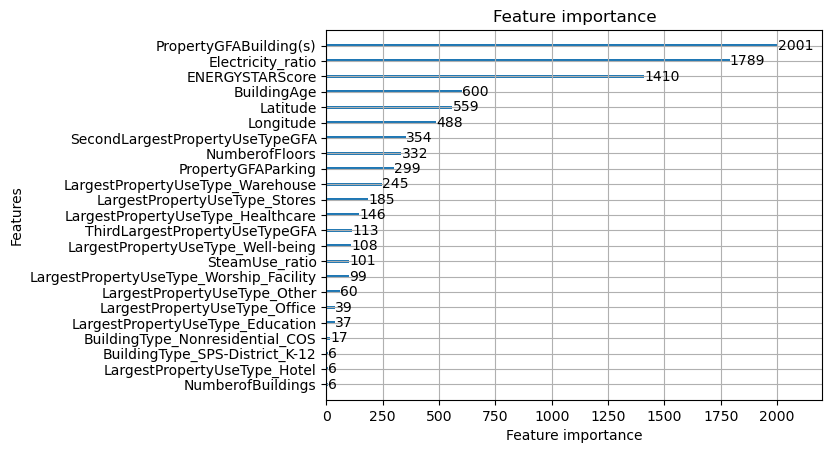

In [27]:
## Interprétabilité globale du modèle

from lightgbm import plot_importance

plot_importance(lgbm_best)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


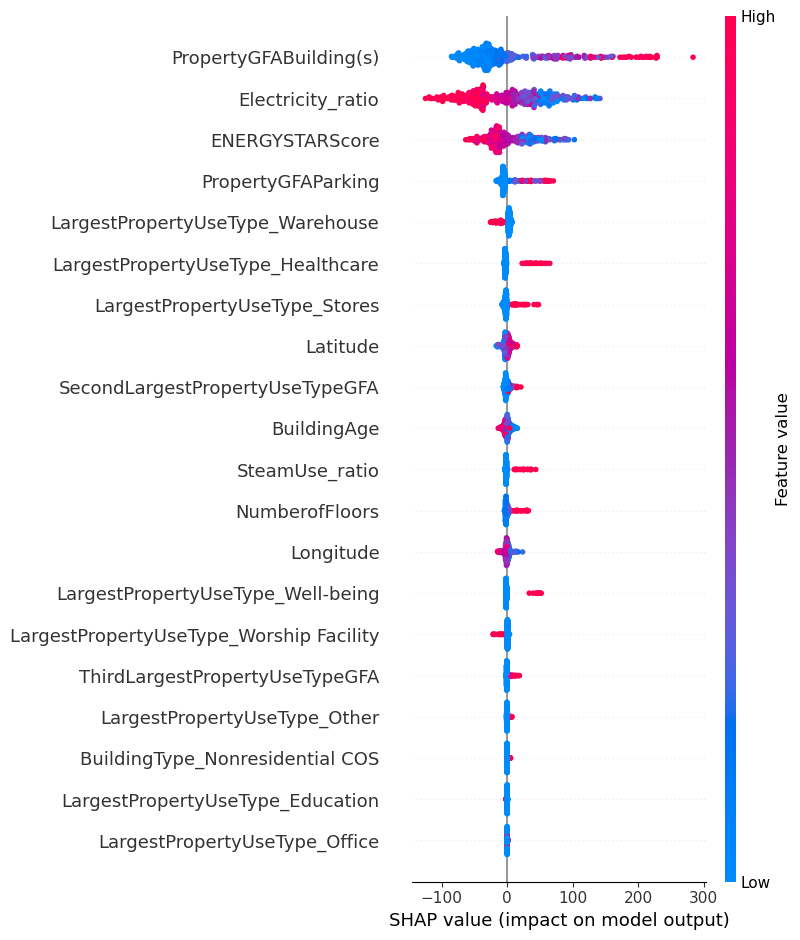

In [28]:
# Graphique SHAP résumé pour l'interprétabilité globale

shap.summary_plot(shap_values, X_test_trf)

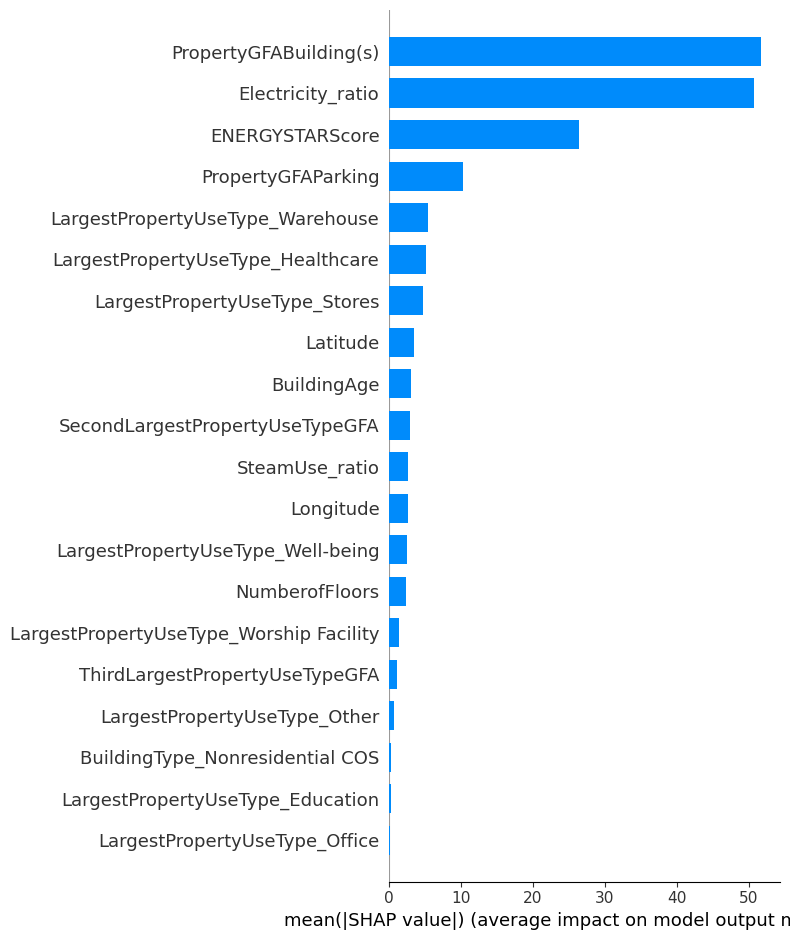

In [29]:
# Création de l'objet explainer
explainer = shap.TreeExplainer(lgbm_best)

# Calcul des valeurs SHAP
shap_values = explainer.shap_values(X_train_trf)

# Tracer le graphique SHAP de synthèse
shap.summary_plot(shap_values, X_train_trf, plot_type="bar")

# Afficher le graphique
plt.show()

# Pertinence de la variable ENERGYSTARScore

In [30]:
# Construisons un modèle de regression via l'algorithme LGBMRegressor sans la variable ENERGYSTARScore

# Diviion des données 70% train, 30% test

X1 = GHGEmissions.drop(columns=['ENERGYSTARScore','TotalGHGEmissions','GHGE_class'], axis=1)
y1 = GHGEmissions['TotalGHGEmissions']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = test_size, stratify=GHGEmissions['GHGE_class'], random_state = seed)

In [31]:
# Standardisation des données 

'''Comme nous avons vu dans le notebook exploratoire que les boxplots des différentes variables présentaient des valeurs extrêmes, nous choisissons de standardiser les données via RobustScaler'''


scaler1 = RobustScaler()
X1_train_trf = pd.DataFrame(data=scaler1.fit_transform(X1_train), index=X1_train.index, columns=X1_train.columns)
X1_test_trf = pd.DataFrame(data=scaler1.transform(X1_test), index=X1_test.index, columns=X1_test.columns)

In [32]:
# Entrainement du modèle
lgbm_best.fit(X1_train_trf, y1_train)

# Calcul du temps d'exécution
elapsed_time = time.time() - start_time
print(f"Temps d'exécution : {elapsed_time:.2f} secondes")

# Les prédictions

y1_train_pred = lgbm_best.predict(X1_train_trf)
y1_test_pred = lgbm_best.predict(X1_test_trf)
    

# Les metrics de performance

R2_train = r2_score(y1_train, y1_train_pred)
R2_test = r2_score(y1_test, y1_test_pred)
RMSE_train = mean_squared_error(y1_train, y1_train_pred,squared=False)
RMSE_test = mean_squared_error(y1_test, y1_test_pred,squared=False)
MAE_train = mean_absolute_error(y1_train, y1_train_pred)
MAE_test = mean_absolute_error(y1_test, y1_test_pred)
MEDAE_train = median_absolute_error(y1_train, y1_train_pred)
MEDAE_test = median_absolute_error(y1_test, y1_test_pred)
EVS_train = explained_variance_score(y1_train, y1_train_pred)
EVS_test = explained_variance_score(y1_test, y1_test_pred)

# Affichage des résultats
performance_table = pd.DataFrame({
    'Métrics': ['R²', 'RMSE', 'MAE','MEDAE','EVS'],
    'Ensemble d\'entraînement': [R2_train, RMSE_train, MAE_train, MEDAE_train, EVS_train],
    'Ensemble de test': [R2_test, RMSE_test, MAE_test, MEDAE_test, EVS_test]
})
print(performance_table)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000737 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1509
[LightGBM] [Info] Number of data points in the train set: 1099, number of used features: 22
[LightGBM] [Info] Start training from score 105.716069
Temps d'exécution : 448.04 secondes
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
  Métrics  Ensemble d

In [33]:
# Entrainement le modèle 'model_RF_best
model_RF_best.fit(X1_train_trf, y1_train)

# Calcul du temps d'exécution
elapsed_time = time.time() - start_time
print(f"Temps d'exécution : {elapsed_time:.2f} secondes")

# Les prédictions

y1_train_pred = model_RF_best.predict(X1_train_trf)
y1_test_pred = model_RF_best.predict(X1_test_trf)
    

# Les metrics de performance

R2_train = r2_score(y1_train, y1_train_pred)
R2_test = r2_score(y1_test, y1_test_pred)
RMSE_train = mean_squared_error(y1_train, y1_train_pred,squared=False)
RMSE_test = mean_squared_error(y1_test, y1_test_pred,squared=False)
MAE_train = mean_absolute_error(y1_train, y1_train_pred)
MAE_test = mean_absolute_error(y1_test, y1_test_pred)
MEDAE_train = median_absolute_error(y1_train, y1_train_pred)
MEDAE_test = median_absolute_error(y1_test, y1_test_pred)
EVS_train = explained_variance_score(y1_train, y1_train_pred)
EVS_test = explained_variance_score(y1_test, y1_test_pred)

# Affichage des résultats
performance_table = pd.DataFrame({
    'Métrics': ['R²', 'RMSE', 'MAE','MEDAE','EVS'],
    'Ensemble d\'entraînement': [R2_train, RMSE_train, MAE_train, MEDAE_train, EVS_train],
    'Ensemble de test': [R2_test, RMSE_test, MAE_test, MEDAE_test, EVS_test]
})
print(performance_table)

Temps d'exécution : 477.95 secondes
  Métrics  Ensemble d'entraînement  Ensemble de test
0      R²                 0.931073          0.632429
1    RMSE                40.686203         95.382168
2     MAE                22.192249         47.665771
3   MEDAE                10.206033         20.530333
4     EVS                 0.931216          0.632435


In [34]:
# Entrainement du modèle xgbr_best

# Créer un modèle xgboost avec les meilleurs hyperparamètres identifiés

xgbr_best = XGBRegressor(max_depth=25, learning_rate=0.01, n_estimators=400, subsample=0.3)

# Enregistrement du temps actuel
start_time = time.time()

# Entraîner le modèle sur l'ensemble d'entraînement
xgbr_best.fit(X1_train_trf, y1_train)

# Calcul du temps d'exécution
elapsed_time = time.time() - start_time
print(f"Temps d'exécution : {elapsed_time:.2f} secondes")

Temps d'exécution : 1.26 secondes


In [35]:
# Les prédictions

y1_train_pred = xgbr_best.predict(X1_train_trf)
y1_test_pred = xgbr_best.predict(X1_test_trf)

# Les metrics de performance

R2_train = r2_score(y1_train, y1_train_pred)
R2_test = r2_score(y1_test, y1_test_pred)
RMSE_train = mean_squared_error(y1_train, y1_train_pred,squared=False)
RMSE_test = mean_squared_error(y1_test, y1_test_pred,squared=False)
MAE_train = mean_absolute_error(y1_train, y1_train_pred)
MAE_test = mean_absolute_error(y1_test, y1_test_pred)
MEDAE_train = median_absolute_error(y1_train, y1_train_pred)
MEDAE_test = median_absolute_error(y1_test, y1_test_pred)
EVS_train = explained_variance_score(y1_train, y1_train_pred)
EVS_test = explained_variance_score(y1_test, y1_test_pred)

# Affichage des résultats
performance_table = pd.DataFrame({
    'Métrics': ['R²', 'RMSE', 'MAE','MEDAE','EVS'],
    'Ensemble d\'entraînement': [R2_train, RMSE_train, MAE_train, MEDAE_train, EVS_train],
    'Ensemble de test': [R2_test, RMSE_test, MAE_test, MEDAE_test, EVS_test]
})
print(performance_table)

  Métrics  Ensemble d'entraînement  Ensemble de test
0      R²                 0.901933          0.643323
1    RMSE                48.530480         93.958120
2     MAE                24.107834         48.246963
3   MEDAE                10.855214         21.699106
4     EVS                 0.902063          0.643888


''' En prédisant les émissions de CO2 avec le même modèle LGBM et sans retenir l'ENERGYSTARScore comme variable explicative, les performances r2_score sur les données de test ne
varient pas énormément 0.62 contre 0.64 précédemment. Sur les données d'entrainement ces performances sont de 0.78 contre 0.82 précédemment.
Nous constatoons que sans l'ENERGYSTARScore comme variable explicative, le modèle surapprend un peu moins. Cependant ces performances ne sont pas significativement différentes.
Compte tennu des difficultés rencontrées pour obtenir ces données (coût et calcul fastidieux), cette variable n'est pas pertinente pour la prédiction des émissions de CO2.'''

# Interprétabilité du modèle sans l'ENERGYSTARScore comme variable explicative

In [36]:
#Initialisation du Javascript

shap.initjs()

#Création de l'explainer 
explainer = shap.TreeExplainer(lgbm_best)

# Calcul des valeurs SHAP  pour les instances de test
shap_values = explainer.shap_values(X1_test_trf)

#Choisir un exemple spécifique à expliquer
i = 0
shap.force_plot(explainer.expected_value, shap_values[i,:], X1_test_trf.iloc[i,:])

In [37]:
# Création de l'explainer
explainer = lime_tabular.LimeTabularExplainer(X1_train_trf.values,
                                              feature_names=X1_train_trf.columns.values.tolist(),
                                              class_names=['TotalGHGEmissions'],
                                              verbose=True,
                                              mode='regression')
plt.figure(figsize=(10, 10))

# Choisir un exemple spécifique à expliquer
i= 0
exp = explainer.explain_instance(X1_test_trf.values[i], lgbm_best.predict, num_features=6)

# Afficher l'explication
exp.show_in_notebook(show_table=True)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Intercept 226.10581820584167
Prediction_local [49.85601615]
Right: 30.8222202740661


<Figure size 1000x1000 with 0 Axes>

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

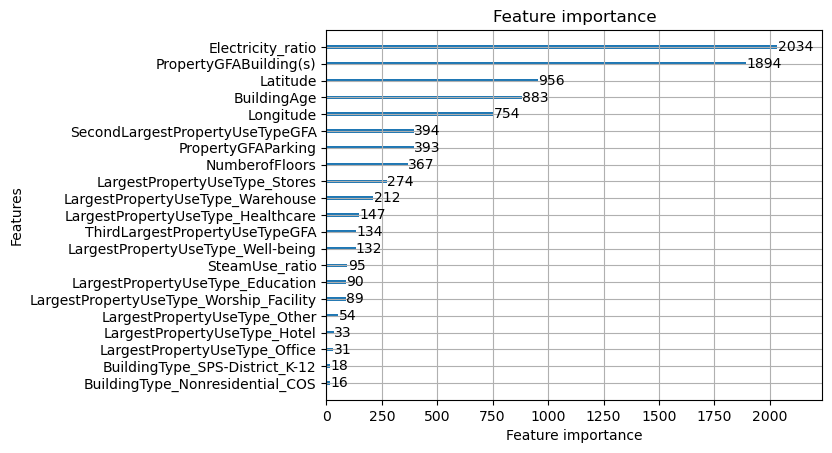

In [38]:
## Interprétabilité globale du modèle

plot_importance(lgbm_best)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


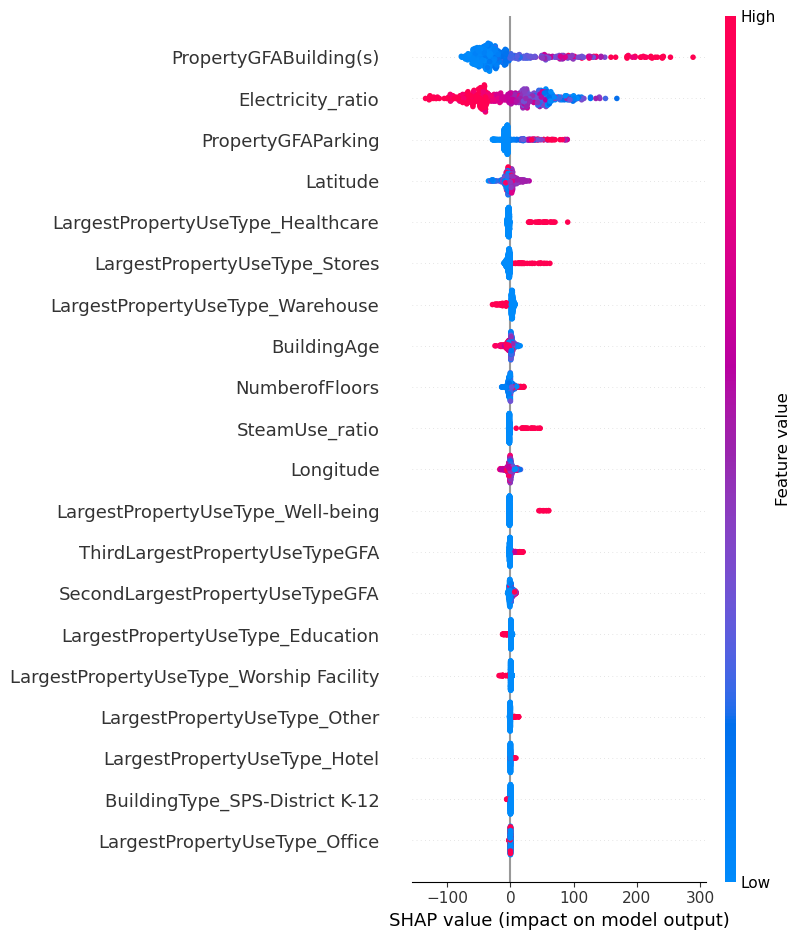

In [39]:
# Graphique SHAP résumé pour l'interprétabilité globale

shap.summary_plot(shap_values, X1_test_trf)

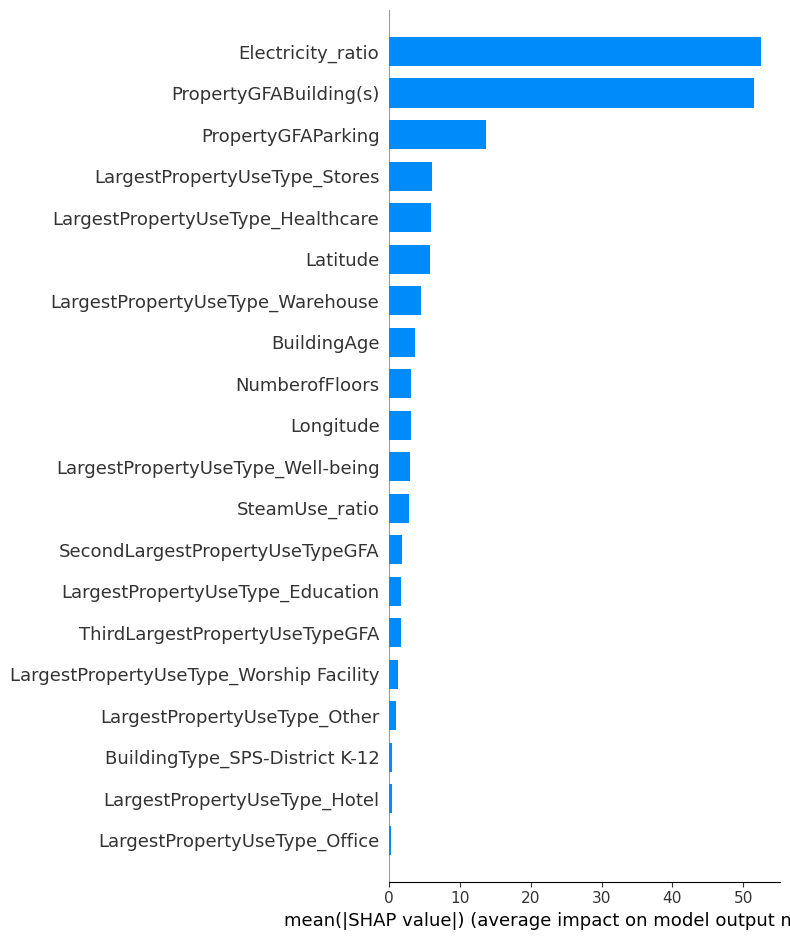

In [40]:
# Création de l'objet explainer
explainer = shap.TreeExplainer(lgbm_best)

# Calcul des valeurs SHAP
shap_values = explainer.shap_values(X1_train_trf)

# Tracer le graphique SHAP de synthèse
shap.summary_plot(shap_values, X1_train_trf, plot_type="bar")

# Afficher le graphique
plt.show()